#### CSE 452: Neural Networks and Fuzzy Systems Lab
Spring-2020, Dept. of CSE, NEUB <br>

#### Student Info
<b>Name:</b> Hamiduzzaman Noyon<br>
<b>Reg. No:</b> 160303020004

### Assignment  4: CNN
<b>This assignment contains four tasks</b><br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<b>2D convolution</b><br>
Kernel W shape: (hxw) <br>

$$y_{ij}=\sum_{k=0}^h \sum_{l=0}^w  X_{i+k,j+l}*w_{kl} $$ 


Output shape:<br>
Let, Input shape: X: (HxW) <br>
     Kernel shape: W: (hxw) <br>
     Output shape: y: (hhxww)<br>

output height would be, 
$$hh = \frac{H-h +2*pad}{stride}+1$$

Let, padding, pad=0 , filter size, hxw=(5x5), stride=1 and Input size: (28x28)<br>
So, $$hh = \frac{28-5+2*0}{1}+1=24$$
Similarly, 
$$ww = \frac{28-5+2*0}{1}+1=24$$

<b>Task 1: 2D convolution</b> <br>
calculate output. <br>
Output should like below,<br><br>
[[ 100.   30.  -50.  -94.]<br>
 [ -50.  -50.  -10.  -85.]<br>
 [-230.   60.   30. -156.]<br>
 [-240.  140.  128. -189.]]

In [2]:
x=np.array([[10,10,20,0,0, 4], [0, 0,50,50,20, 0], [10,60,0,0,30, 2], [120,20,40,40,0, 1], [70, 0,10,80,90, 0], [40, 40,0,0,8,10]])
kernel=np.array([[-1,0, 1],[-2,0,2], [-1,0,1]])
print(x)
print('kernel:')
print(kernel)

[[ 10  10  20   0   0   4]
 [  0   0  50  50  20   0]
 [ 10  60   0   0  30   2]
 [120  20  40  40   0   1]
 [ 70   0  10  80  90   0]
 [ 40  40   0   0   8  10]]
kernel:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


In [3]:
def convolution(x,kernel):
    temp=0
    temp2=[]
    conv=[]
    for i in range(len(x)-2):
        for j in range(len(x)-2):
            for k in range(len(kernel)):
                for l in range(len(kernel)):
                    temp=temp+x[k+i][l+j]*kernel[k][l]
            temp2.append(temp)
        #conv.append(temp)
            temp=0
        conv.append(temp2)
        temp2=[]
    return conv

In [4]:
conv=convolution(x,kernel)
print("conv\n",np.array(conv))

conv
 [[ 100   30  -50  -94]
 [ -50  -50  -10  -85]
 [-230   60   30 -156]
 [-240  140  128 -189]]


<b>Task 2: ReLU</b><br>
$$y=max(0,x)$$

[[100.,  30.,   0.,   0.],<br>
[  0.,   0.,   0.,   0.],<br>
[  0.,  60.,  30.,   0.],<br>
[  0., 140., 128.,   0.]]

In [5]:
def relu(arr):
    for i in range(len(arr)):
        for j in range(len(arr)):
            if(arr[i][j]<0):
                arr[i][j]=0
    return arr

In [6]:
rel=relu(conv)
print("Relu\n",np.array(rel))

Relu
 [[100  30   0   0]
 [  0   0   0   0]
 [  0  60  30   0]
 [  0 140 128   0]]


<b>Task 3: MaxPooling</b><br>
Pool size=2<br>
    
output should like below,<br>
[[100. -10.] <br>
 [140. 128.]] 

In [7]:
def maxpool(rel):
    mx_p=[]
    temp=[]
    for x in range(int(len(rel)/2)):
        for y in range(int(len(rel)/2)):
            k=rel[x*2:2+(x*2),y*2:2+(y*2)]
            temp.append(np.amax(k))
            #k1=rel[x*2:2+(x*2),2:2*2]
        mx_p.append(temp)
        temp=[]
    return mx_p

In [8]:
rel=np.array(rel)
mx_p=maxpool(rel)
print(mx_p)

[[100, 0], [140, 128]]


<b>Task 4: Apply on Image</b>
1. Load <b>lena.png</b> and plot the image.
2. apply convolution and plot the output (use the filter used above)
3. apply relu and plot the output
4. apply maxpool and plot the output.

In [7]:
#your code goes here.

<b>Import OpenCV python library</b><br>
Install if necessary. [Link](https://pypi.org/project/opencv-python/)

In [9]:
import cv2

In [10]:
org = cv2.imread('lena.png')
org= cv2.cvtColor(org, cv2.COLOR_BGR2RGB) #for matplotlib

In [11]:
print('rgb image shape: ',org.shape)

rgb image shape:  (220, 220, 3)


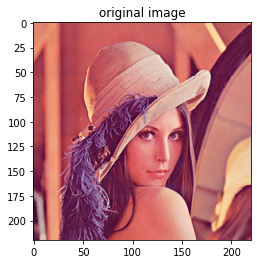

In [12]:
plt.imshow(org )
plt.title("original image")
plt.show()

<b>Convert to grayscale</b>

In [13]:
X = cv2.cvtColor(org, cv2.COLOR_BGR2GRAY)
X.shape

(220, 220)

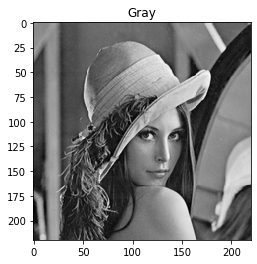

In [14]:
plt.imshow(X, cmap='gray')
plt.title("Gray")
plt.show()

In [15]:
conv2=convolution(X,kernel)

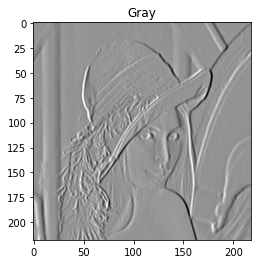

In [16]:
#plot
plt.imshow(conv2, cmap='gray')
plt.title("Gray")
plt.show()

In [17]:
#apply relu
rel2=relu(conv2)


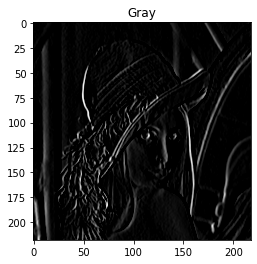

In [18]:
#plot
plt.imshow(rel2, cmap='gray')
plt.title("Gray")
plt.show()

In [19]:
rel2_1=np.array(rel2)
mx_p2=maxpool(rel2_1)

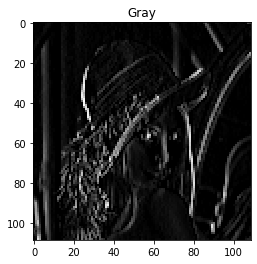

In [20]:
plt.imshow(mx_p2, cmap='gray')
plt.title("Gray")
plt.show()

### Submission: Honor Code
Plese type the following in the next cell. Replace the underlined text with your own. 

I am <u>Hamiduzzaman Noyon</u> bearing registration no. <u>160303020004</u> hereby declaring that I myself did my assignments, I didn't directly copy any code from others. I have a complete understanding of my code and can explain. I respect this honor code and I believe it will be useful to maintain academic integrity.<br>

Name: <u>Hamiduzzaman Noyon</u><br>
Date: <u>25/07/20</u>

_start writing here_